In [3]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import symbols, diff, lambdify,sympify
from tqdm import tqdm
import pandas as pd

plt.style.use('ggplot')

!["a"](17.4.jpg)

In [64]:
data = {"X":[6,7,11,15,17,21,23,29,29,37,39],"Y":[29,21,29,14,21,15,7,7,13,0,3]}
df = pd.DataFrame(data)
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
XY = np.multiply(X,Y)
X2 = np.multiply(X,X)
Y2 = np.multiply(Y,Y)

df["XY"]= XY
df["X2"]=X2
df["Y2"]=Y2

sums = pd.DataFrame({"X":[df["X"].sum()],"Y":[df["Y"].sum()],"XY":[df["XY"].sum()],"X2":[df["X2"].sum()],"Y2":[df["Y2"].sum()]})

In [95]:
n=df.shape[0]
a1 = (n*sums["XY"]-sums["Y"]*sums["X"])/(n*sums["X2"]-sums["X"]**2)
a0 = (sums["Y"]-a1*sums["X"])/(n)
df['f'] = df['X'].apply(lambda x: a1*x+a0)


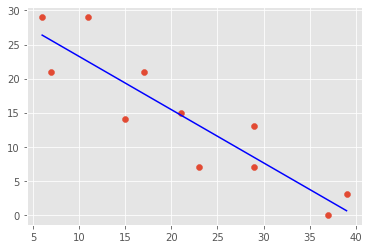

In [94]:
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],df["f"],color="blue")

234